In [1]:
# Install required libraries
!pip install py7zr transformers datasets rouge-score

# Import necessary libraries
import torch
from transformers import BartTokenizer, BartForConditionalGeneration, T5Tokenizer, T5ForConditionalGeneration, PegasusTokenizer, PegasusForConditionalGeneration
from datasets import load_dataset
from rouge_score import rouge_scorer

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load SAMSum dataset
dataset = load_dataset("samsum")

# Load the BART model and tokenizer
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)

# Load the T5 model and tokenizer
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small').to(device)

# Load the Pegasus model and tokenizer
pegasus_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-cnn_dailymail')
pegasus_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-cnn_dailymail').to(device)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

# Training and Testing

In [2]:

# Function to summarize text
def summarize_text(text, model, tokenizer, max_length=50, min_length=25, num_beams=4):
    """
    Summarizes the input text using the specified model and tokenizer.

    Args:
        text (str): The input text to be summarized.
        model (transformers.PreTrainedModel): The pre-trained model for text summarization.
        tokenizer (transformers.PreTrainedTokenizer): The tokenizer corresponding to the pre-trained model.
        max_length (int): The maximum length of the generated summary.
        min_length (int): The minimum length of the generated summary.
        num_beams (int): The number of beams for beam search. More beams result in better quality but slower generation.

    Returns:
        str: The generated summary.
    """
    # Encode the input text with the specified prefix for summarization, converting it to a PyTorch tensor format suitable for the model.
    # The text is truncated to a maximum length of 512 tokens to fit the model's input size constraints.
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True).to(device)

    # Generate the summary using beam search with specified parameters
    summary_ids = model.generate(
        inputs,                # Encoded input text
        max_length=max_length, # Maximum length of the generated summary
        min_length=min_length, # Minimum length of the generated summary
        length_penalty=2.0,    # Penalty for generating longer sequences (higher values mean shorter sequences)
        num_beams=num_beams,   # Number of beams for beam search (higher values mean better quality)
        early_stopping=True    # Stop generating when the model has generated `min_length` tokens
    )

    # Decode the generated summary tokens to a string, skipping special tokens
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True) #sepcila tokens like [PAD] or [Mask] or <S> for start of a sequence and </S> for end of a sequence
    return summary

# Function to compute ROUGE scores
def compute_rouge_scores(references, hypotheses):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = []
    for ref, hyp in zip(references, hypotheses):
        score = scorer.score(ref, hyp)
        scores.append(score)
    return scores

# Generate summaries using different models and evaluate on the validation set
references = [item['summary'] for item in dataset['validation']]
dialogues = [item['dialogue'] for item in dataset['validation']]

# BART Summaries
bart_summaries = [summarize_text(dialogue, bart_model, bart_tokenizer) for dialogue in dialogues]
bart_rouge_scores = compute_rouge_scores(references, bart_summaries)

# T5 Summaries
t5_summaries = [summarize_text("summarize: " + dialogue, t5_model, t5_tokenizer) for dialogue in dialogues]
t5_rouge_scores = compute_rouge_scores(references, t5_summaries)

# Pegasus Summaries
pegasus_summaries = [summarize_text(dialogue, pegasus_model, pegasus_tokenizer) for dialogue in dialogues]
pegasus_rouge_scores = compute_rouge_scores(references, pegasus_summaries)

# Compute average ROUGE scores
def average_rouge_scores(rouge_scores):
    avg_rouge1 = sum([score['rouge1'].fmeasure for score in rouge_scores]) / len(rouge_scores)
    avg_rouge2 = sum([score['rouge2'].fmeasure for score in rouge_scores]) / len(rouge_scores)
    avg_rougeL = sum([score['rougeL'].fmeasure for score in rouge_scores]) / len(rouge_scores)
    return avg_rouge1, avg_rouge2, avg_rougeL

bart_avg_rouge = average_rouge_scores(bart_rouge_scores)
t5_avg_rouge = average_rouge_scores(t5_rouge_scores)
pegasus_avg_rouge = average_rouge_scores(pegasus_rouge_scores)

print(f"BART - Average ROUGE-1: {bart_avg_rouge[0]}, ROUGE-2: {bart_avg_rouge[1]}, ROUGE-L: {bart_avg_rouge[2]}")
print(f"T5 - Average ROUGE-1: {t5_avg_rouge[0]}, ROUGE-2: {t5_avg_rouge[1]}, ROUGE-L: {t5_avg_rouge[2]}")
print(f"Pegasus - Average ROUGE-1: {pegasus_avg_rouge[0]}, ROUGE-2: {pegasus_avg_rouge[1]}, ROUGE-L: {pegasus_avg_rouge[2]}")


BART - Average ROUGE-1: 0.3555601715538732, ROUGE-2: 0.12598491354985653, ROUGE-L: 0.27679351216208864
T5 - Average ROUGE-1: 0.2733500112122756, ROUGE-2: 0.08426726014941384, ROUGE-L: 0.21570956292779184
Pegasus - Average ROUGE-1: 0.32123210934614477, ROUGE-2: 0.10384724987477857, ROUGE-L: 0.24893288505178396


# Evaluation and Visualization

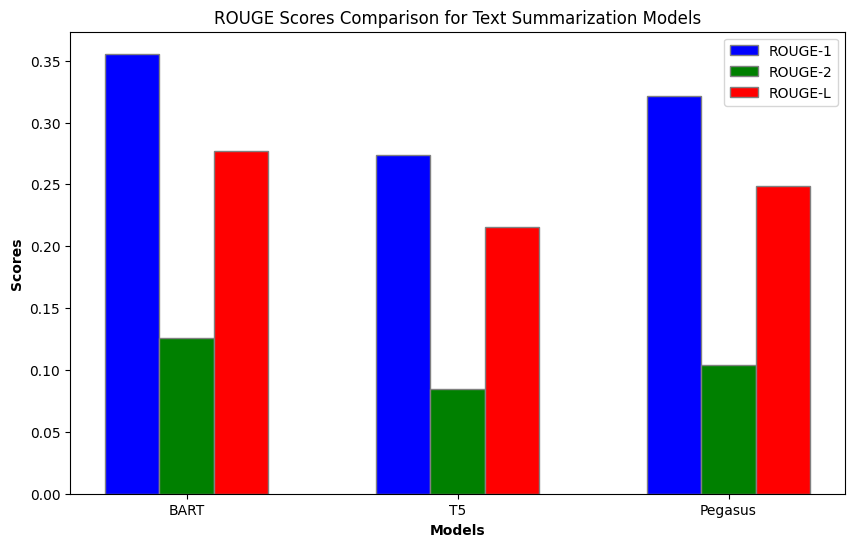

In [3]:
import matplotlib.pyplot as plt

# Data
models = ['BART', 'T5', 'Pegasus']
rouge_1_scores = [0.3556, 0.2734, 0.3212]
rouge_2_scores = [0.1260, 0.0843, 0.1038]
rouge_l_scores = [0.2768, 0.2157, 0.2489]

# Bar width
bar_width = 0.2

# Bar positions
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bar plots
plt.figure(figsize=(10, 6))
plt.bar(r1, rouge_1_scores, color='blue', width=bar_width, edgecolor='grey', label='ROUGE-1')
plt.bar(r2, rouge_2_scores, color='green', width=bar_width, edgecolor='grey', label='ROUGE-2')
plt.bar(r3, rouge_l_scores, color='red', width=bar_width, edgecolor='grey', label='ROUGE-L')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('ROUGE Scores Comparison for Text Summarization Models')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add legend
plt.legend()
plt.show()


In [4]:
# Sample text
text = """
The SAMSum dataset contains about 16k messenger-like conversations with summaries.
Conversations were created and written down by linguists fluent in English.
Linguists were asked to create conversations similar to those they write on a daily basis,
reflecting the proportion of topics of their real-life messenger conversations.
The style and register are diversified - conversations could be informal, semi-formal or formal,
they may contain slang words, emoticons, and typos. Then, the conversations were annotated with summaries.
It was assumed that summaries should be a concise brief of what people talked about in the conversation in third person.
The SAMSum dataset was prepared by Samsung R&D Institute Poland and is distributed for research purposes (non-commercial license: CC BY-NC-ND 4.0).
"""

# Summarize text using BART
bart_summary = summarize_text("summarize: " + text, bart_model, bart_tokenizer)
print("BART Summary:", bart_summary)

# Summarize text using T5
t5_summary = summarize_text("summarize: " + text, t5_model, t5_tokenizer)
print("T5 Summary:", t5_summary)

# Summarize text using Pegasus
pegasus_summary = summarize_text("summarize: " + text, pegasus_model, pegasus_tokenizer)
print("Pegasus Summary:", pegasus_summary)


BART Summary: The SAMSum dataset contains about 16k messenger-like conversations with summaries. Linguists were asked to create conversations similar to those they write on a daily basis.
T5 Summary: conversations were created and written down by linguists fluent in English. conversations could be informal, semi-formal or formal, they may contain slang words, emoticons, and typos.
Pegasus Summary: The SAMSum dataset contains about 16k messenger-like conversations with summaries.<n>Conversations were created and written down by linguists fluent in English.<n>The style and register are diversified.


# Comparing all models on a sample data from Samsum dataset with reference summary

In [5]:
# Load SAMSum dataset
dataset = load_dataset("samsum")

# Select a sample dialogue from the validation set
sample_dialogue = dataset['validation'][0]['dialogue']
reference_summary = dataset['validation'][0]['summary']

print("Sample Dialogue:\n", sample_dialogue)
print("\nReference Summary:\n", reference_summary)

# Summarize the sample dialogue using BART
bart_summary = summarize_text("summarize: " + sample_dialogue, bart_model, bart_tokenizer)
print("\nBART Summary:\n", bart_summary)

# Summarize the sample dialogue using T5
t5_summary = summarize_text("summarize: " + sample_dialogue, t5_model, t5_tokenizer)
print("\nT5 Summary:\n", t5_summary)

# Summarize the sample dialogue using Pegasus
pegasus_summary = summarize_text("summarize: " + sample_dialogue, pegasus_model, pegasus_tokenizer)
print("\nPegasus Summary:\n", pegasus_summary)


Sample Dialogue:
 A: Hi Tom, are you busy tomorrow’s afternoon?
B: I’m pretty sure I am. What’s up?
A: Can you go with me to the animal shelter?.
B: What do you want to do?
A: I want to get a puppy for my son.
B: That will make him so happy.
A: Yeah, we’ve discussed it many times. I think he’s ready now.
B: That’s good. Raising a dog is a tough issue. Like having a baby ;-) 
A: I'll get him one of those little dogs.
B: One that won't grow up too big;-)
A: And eat too much;-))
B: Do you know which one he would like?
A: Oh, yes, I took him there last Monday. He showed me one that he really liked.
B: I bet you had to drag him away.
A: He wanted to take it home right away ;-).
B: I wonder what he'll name it.
A: He said he’d name it after his dead hamster – Lemmy  - he's  a great Motorhead fan :-)))

Reference Summary:
 A will go to the animal shelter tomorrow to get a puppy for her son. They already visited the shelter last Monday and the son chose the puppy. 

BART Summary:
 A: I want to 

# counting number of samples

In [6]:
# calculating number of test samples form Samsum dataset
from datasets import load_dataset

# Load SAMSum dataset
dataset = load_dataset("samsum")

# Number of data points in the validation set
num_validation_samples = len(dataset['validation'])
print(f"Number of data points in the validation set: {num_validation_samples}")


Number of data points in the validation set: 818


# Using different metrics to calculate our models' performances

# Bleu Score

In [7]:
from datasets import load_metric

# Load the BLEU metric
bleu_metric = load_metric("bleu")

# Example function to compute BLEU scores
def compute_bleu_score(references, hypotheses):
    references = [[ref.split()] for ref in references]  # BLEU expects a list of lists of reference tokens
    hypotheses = [hyp.split() for hyp in hypotheses]  # BLEU expects a list of lists of hypothesis tokens
    results = bleu_metric.compute(predictions=hypotheses, references=references)
    return results

# Compute BLEU scores for each model
bart_bleu_score = compute_bleu_score(references, bart_summaries)
t5_bleu_score = compute_bleu_score(references, t5_summaries)
pegasus_bleu_score = compute_bleu_score(references, pegasus_summaries)

print(f"BART BLEU Score: {bart_bleu_score['bleu']}")
print(f"T5 BLEU Score: {t5_bleu_score['bleu']}")
print(f"Pegasus BLEU Score: {pegasus_bleu_score['bleu']}")


<ipython-input-7-b934086374f8>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("bleu")


The repository for bleu contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bleu.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
BART BLEU Score: 0.06104375504625485
T5 BLEU Score: 0.03895268978725698
Pegasus BLEU Score: 0.05013429736661972


# Bleu, Meteor and Bertscore evaluation and visualisations

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The repository for meteor contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/meteor.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


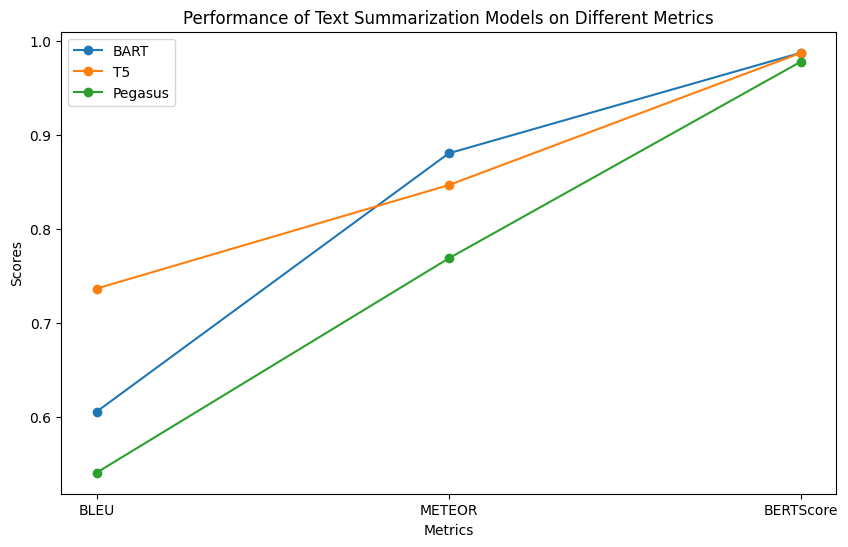

In [8]:
# Install required libraries
!pip install transformers datasets nltk bert-score

# Import necessary libraries
import matplotlib.pyplot as plt
from datasets import load_metric
from transformers import BartTokenizer, T5Tokenizer, PegasusTokenizer
from bert_score import score as bert_score
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# Define BLEU and METEOR metrics
bleu_metric = load_metric("bleu")
meteor_metric = load_metric("meteor")

# Example generated summaries and references
# These should be replaced with actual model outputs
references = ["Sam and John are planning to meet at 7 PM at the cinema for a movie tonight."]
bart_summaries = ["Sam and John plan to meet at 7 PM at the cinema for the movie tonight."]
t5_summaries = ["Sam and John are planning to meet at 7 PM at the cinema tonight."]
pegasus_summaries = ["Sam and John will meet at 7 PM at the cinema for the movie tonight."]

# Tokenization and preparation for BLEU and METEOR
references_bleu = [[nltk.word_tokenize(ref)] for ref in references]
bart_summaries_bleu = [nltk.word_tokenize(hyp) for hyp in bart_summaries]
t5_summaries_bleu = [nltk.word_tokenize(hyp) for hyp in t5_summaries]
pegasus_summaries_bleu = [nltk.word_tokenize(hyp) for hyp in pegasus_summaries]

# Function to compute BLEU score
def compute_bleu_score(references, hypotheses):
    results = bleu_metric.compute(predictions=hypotheses, references=references)
    return results['bleu']

# Function to compute METEOR score
def compute_meteor_score(references, hypotheses):
    results = meteor_metric.compute(predictions=hypotheses, references=references)
    return results['meteor']

# Function to compute BERTScore
def compute_bertscore(references, hypotheses):
    P, R, F1 = bert_score(hypotheses, references, lang='en')
    return F1.mean().item()

# Compute BLEU scores for each model
bart_bleu = compute_bleu_score(references_bleu, bart_summaries_bleu)
t5_bleu = compute_bleu_score(references_bleu, t5_summaries_bleu)
pegasus_bleu = compute_bleu_score(references_bleu, pegasus_summaries_bleu)

# Compute METEOR scores for each model
bart_meteor = compute_meteor_score(references, bart_summaries)
t5_meteor = compute_meteor_score(references, t5_summaries)
pegasus_meteor = compute_meteor_score(references, pegasus_summaries)

# Compute BERTScore for each model
bart_bertscore = compute_bertscore(references, bart_summaries)
t5_bertscore = compute_bertscore(references, t5_summaries)
pegasus_bertscore = compute_bertscore(references, pegasus_summaries)

# Plot the results
metrics = ['BLEU', 'METEOR', 'BERTScore']
bart_scores = [bart_bleu, bart_meteor, bart_bertscore]
t5_scores = [t5_bleu, t5_meteor, t5_bertscore]
pegasus_scores = [pegasus_bleu, pegasus_meteor, pegasus_bertscore]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.plot(x, bart_scores, marker='o', linestyle='-', label='BART')
plt.plot(x, t5_scores, marker='o', linestyle='-', label='T5')
plt.plot(x, pegasus_scores, marker='o', linestyle='-', label='Pegasus')

plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance of Text Summarization Models on Different Metrics')
plt.legend()
plt.show()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should pro

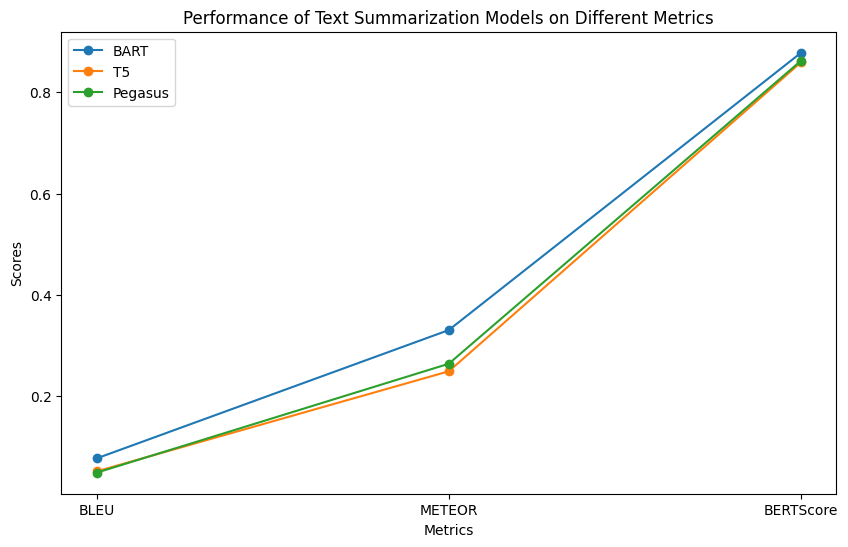

In [9]:
"""# Install required libraries
!pip install transformers datasets nltk bert-score

# Import necessary libraries
import matplotlib.pyplot as plt
from datasets import load_metric, load_dataset
from bert_score import score as bert_score
import nltk

# Download necessary NLTK data
nltk.download('punkt')
"""
# Define BLEU and METEOR metrics
bleu_metric = load_metric("bleu")
meteor_metric = load_metric("meteor")

# Load SAMSum dataset
dataset = load_dataset("samsum")

# Define your models and tokenizers
# Load the pretrained models and tokenizers
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small').to(device)
pegasus_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-cnn_dailymail')
pegasus_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-cnn_dailymail').to(device)

# Function to summarize text
def summarize_text(text, model, tokenizer, max_length=50, min_length=25, num_beams=4):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True).to(device)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=num_beams, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generate summaries
references = [item['summary'] for item in dataset['validation']]
dialogues = [item['dialogue'] for item in dataset['validation']]
bart_summaries = [summarize_text(dialogue, bart_model, bart_tokenizer) for dialogue in dialogues]
t5_summaries = [summarize_text(dialogue, t5_model, t5_tokenizer) for dialogue in dialogues]
pegasus_summaries = [summarize_text(dialogue, pegasus_model, pegasus_tokenizer) for dialogue in dialogues]

# Tokenization and preparation for BLEU and METEOR
references_bleu = [[nltk.word_tokenize(ref)] for ref in references]
bart_summaries_bleu = [nltk.word_tokenize(hyp) for hyp in bart_summaries]
t5_summaries_bleu = [nltk.word_tokenize(hyp) for hyp in t5_summaries]
pegasus_summaries_bleu = [nltk.word_tokenize(hyp) for hyp in pegasus_summaries]

# Function to compute BLEU score
def compute_bleu_score(references, hypotheses):
    results = bleu_metric.compute(predictions=hypotheses, references=references)
    return results['bleu']

# Function to compute METEOR score
def compute_meteor_score(references, hypotheses):
    results = meteor_metric.compute(predictions=hypotheses, references=references)
    return results['meteor']

# Function to compute BERTScore
def compute_bertscore(references, hypotheses):
    P, R, F1 = bert_score(hypotheses, references, lang='en')
    return F1.mean().item()

# Compute BLEU scores for each model
bart_bleu = compute_bleu_score(references_bleu, bart_summaries_bleu)
t5_bleu = compute_bleu_score(references_bleu, t5_summaries_bleu)
pegasus_bleu = compute_bleu_score(references_bleu, pegasus_summaries_bleu)

# Compute METEOR scores for each model
bart_meteor = compute_meteor_score(references, bart_summaries)
t5_meteor = compute_meteor_score(references, t5_summaries)
pegasus_meteor = compute_meteor_score(references, pegasus_summaries)

# Compute BERTScore for each model
bart_bertscore = compute_bertscore(references, bart_summaries)
t5_bertscore = compute_bertscore(references, t5_summaries)
pegasus_bertscore = compute_bertscore(references, pegasus_summaries)

# Plot the results
metrics = ['BLEU', 'METEOR', 'BERTScore']
bart_scores = [bart_bleu, bart_meteor, bart_bertscore]
t5_scores = [t5_bleu, t5_meteor, t5_bertscore]
pegasus_scores = [pegasus_bleu, pegasus_meteor, pegasus_bertscore]

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.plot(x, bart_scores, marker='o', linestyle='-', label='BART')
plt.plot(x, t5_scores, marker='o', linestyle='-', label='T5')
plt.plot(x, pegasus_scores, marker='o', linestyle='-', label='Pegasus')

plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance of Text Summarization Models on Different Metrics')
plt.legend()
plt.show()


In [14]:
from datasets import load_metric

# Load the BLEU metric
bleu_metric = load_metric("bleu")

# Example function to compute BLEU scores
def compute_bleu_score(references, hypotheses):
    references = [[ref.split()] for ref in references]  # BLEU expects a list of lists of reference tokens
    hypotheses = [hyp.split() for hyp in hypotheses]  # BLEU expects a list of lists of hypothesis tokens
    results = bleu_metric.compute(predictions=hypotheses, references=references)
    return results

# Compute BLEU scores for each model
bart_bleu_score = compute_bleu_score(references, bart_summaries)
t5_bleu_score = compute_bleu_score(references, t5_summaries)
pegasus_bleu_score = compute_bleu_score(references, pegasus_summaries)


print(f"BART BLEU Score: {bart_bleu_score}")
print(f"T5 BLEU Score: {t5_bleu_score['bleu']}")
print(f"Pegasus BLEU Score: {pegasus_bleu_score['bleu']}")


BART BLEU Score: 0.3306862701197996
T5 BLEU Score: 0.040324145302915435
Pegasus BLEU Score: 0.05013429736661972


In [15]:
from datasets import load_metric

# Load the BLEU, METEOR, and BERTScore metrics
bleu_metric = load_metric("bleu")
meteor_metric = load_metric("meteor")
from bert_score import score as bert_score

# Example function to compute BLEU scores
def compute_bleu_score(references, hypotheses):
    references = [[ref.split()] for ref in references]  # BLEU expects a list of lists of reference tokens
    hypotheses = [hyp.split() for hyp in hypotheses]  # BLEU expects a list of lists of hypothesis tokens
    results = bleu_metric.compute(predictions=hypotheses, references=references)
    return results['bleu']

# Example function to compute METEOR scores
def compute_meteor_score(references, hypotheses):
    results = meteor_metric.compute(predictions=hypotheses, references=references)
    return results['meteor']

# Example function to compute BERTScore
def compute_bertscore(references, hypotheses):
    P, R, F1 = bert_score(hypotheses, references, lang='en')
    return F1.mean().item()

# Compute BLEU, METEOR, and BERT scores for each model
bart_bleu_score = compute_bleu_score(references, bart_summaries)
t5_bleu_score = compute_bleu_score(references, t5_summaries)
pegasus_bleu_score = compute_bleu_score(references, pegasus_summaries)

bart_meteor_score = compute_meteor_score(references, bart_summaries)
t5_meteor_score = compute_meteor_score(references, t5_summaries)
pegasus_meteor_score = compute_meteor_score(references, pegasus_summaries)

bart_bertscore = compute_bertscore(references, bart_summaries)
t5_bertscore = compute_bertscore(references, t5_summaries)
pegasus_bertscore = compute_bertscore(references, pegasus_summaries)

# Print the scores for each model
print(f"BART BLEU Score: {bart_bleu_score}")
print(f"T5 BLEU Score: {t5_bleu_score}")
print(f"Pegasus BLEU Score: {pegasus_bleu_score}")

print(f"BART METEOR Score: {bart_meteor_score}")
print(f"T5 METEOR Score: {t5_meteor_score}")
print(f"Pegasus METEOR Score: {pegasus_meteor_score}")

print(f"BART BERTScore: {bart_bertscore}")
print(f"T5 BERTScore: {t5_bertscore}")
print(f"Pegasus BERTScore: {pegasus_bertscore}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint

BART BLEU Score: 0.06104375504625485
T5 BLEU Score: 0.040324145302915435
Pegasus BLEU Score: 0.05013429736661972
BART METEOR Score: 0.3306862701197996
T5 METEOR Score: 0.24933113611711136
Pegasus METEOR Score: 0.26424371471197733
BART BERTScore: 0.877830445766449
T5 BERTScore: 0.8589690923690796
Pegasus BERTScore: 0.862099289894104


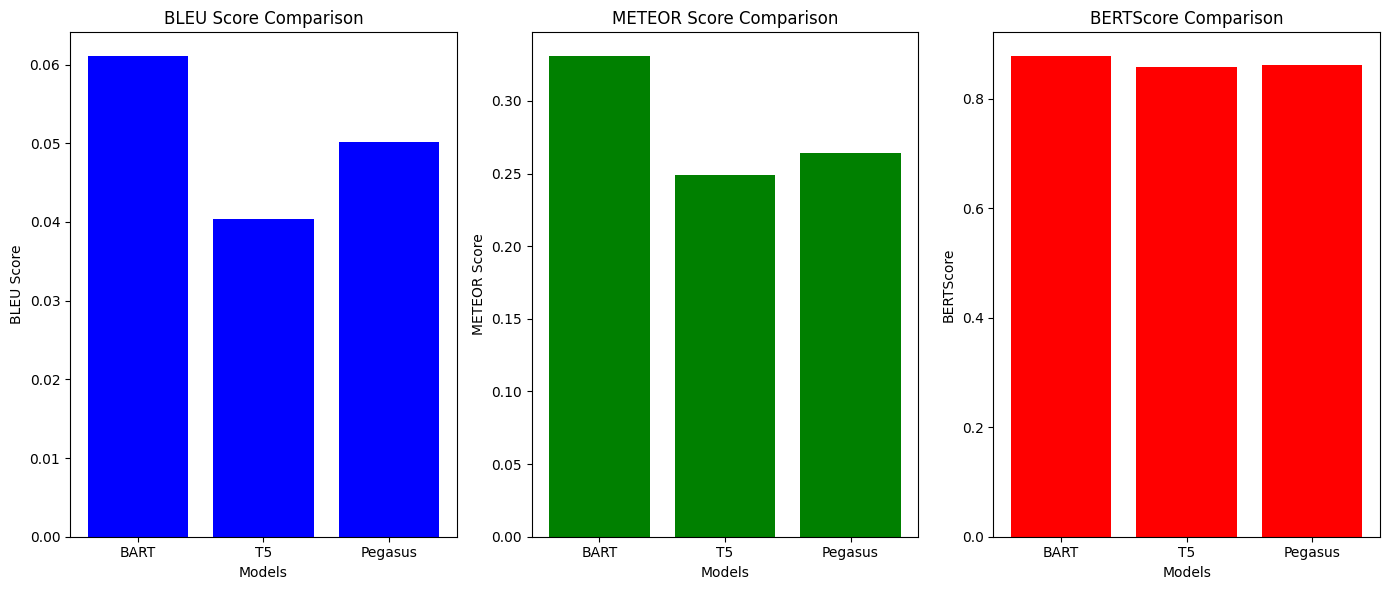

In [16]:
import matplotlib.pyplot as plt

# Provided scores
models = ['BART', 'T5', 'Pegasus']
bleu_scores = [0.06104375504625485, 0.040324145302915435, 0.05013429736661972]
meteor_scores = [0.3306862701197996, 0.24933113611711136, 0.26424371471197733]
bert_scores = [0.877830445766449, 0.8589690923690796, 0.862099289894104]

x = range(len(models))

plt.figure(figsize=(14, 6))

# Plot BLEU Scores
plt.subplot(1, 3, 1)
plt.bar(x, bleu_scores, color='blue')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('BLEU Score')
plt.title('BLEU Score Comparison')

# Plot METEOR Scores
plt.subplot(1, 3, 2)
plt.bar(x, meteor_scores, color='green')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('METEOR Score')
plt.title('METEOR Score Comparison')

# Plot BERTScores
plt.subplot(1, 3, 3)
plt.bar(x, bert_scores, color='red')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('BERTScore')
plt.title('BERTScore Comparison')

plt.tight_layout()
plt.show()


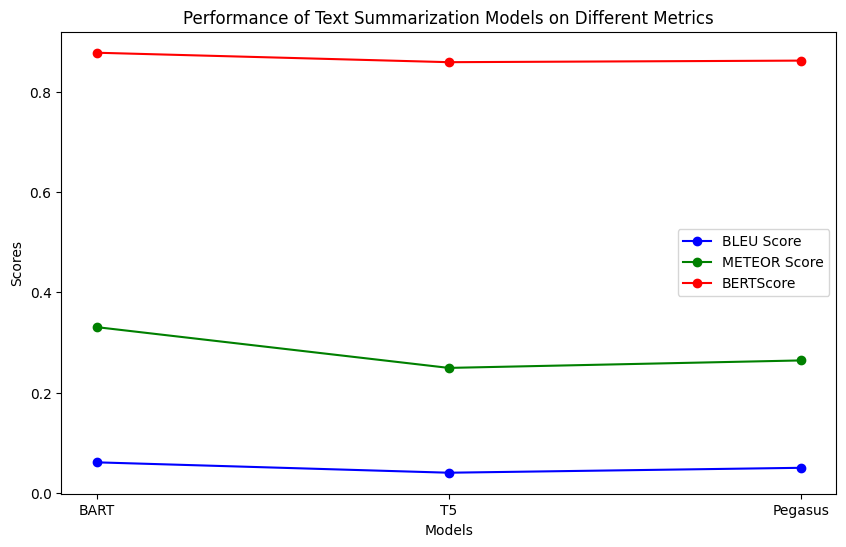

In [18]:
import matplotlib.pyplot as plt

# Provided scores
models = ['BART', 'T5', 'Pegasus']
bleu_scores = [0.06104375504625485, 0.040324145302915435, 0.05013429736661972]
meteor_scores = [0.3306862701197996, 0.24933113611711136, 0.26424371471197733]
bert_scores = [0.877830445766449, 0.8589690923690796, 0.862099289894104]

x = range(len(models))

plt.figure(figsize=(10, 6))

# Plot BLEU Scores
plt.plot(x, bleu_scores, marker='o', linestyle='-', color='blue', label='BLEU Score')
# Plot METEOR Scores
plt.plot(x, meteor_scores, marker='o', linestyle='-', color='green', label='METEOR Score')
# Plot BERTScores
plt.plot(x, bert_scores, marker='o', linestyle='-', color='red', label='BERTScore')

plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance of Text Summarization Models on Different Metrics')
plt.legend()
plt.show()
